In [1]:
%matplotlib inline


# Classification

The following example shows how to fit *auto-sklearn* to optimize for two
competing metrics: `precision` and `recall` (read more on this tradeoff
in the [scikit-learn docs](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html).

Auto-sklearn uses [SMAC3's implementation of ParEGO](https://automl.github.io/SMAC3/main/details/multi_objective.html).
Multi-objective ensembling and proper access to the full Pareto set will be added in the near
future.


In [2]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.metrics

import autosklearn.classification
import autosklearn.metrics

/home/peng/opt/anaconda3/envs/autosl/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/peng/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Data Loading



In [3]:
X, y = sklearn.datasets.fetch_openml(data_id=31, return_X_y=True, as_frame=True)
# Change the target to align with scikit-learn's convention that
# ``1`` is the minority class. In this example it is predicting
# that a credit is "bad", i.e. that it will default.
y = np.array([1 if val == "bad" else 0 for val in y])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

## Build and fit a classifier



In [4]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    memory_limit=16384,
    metric=[autosklearn.metrics.precision, autosklearn.metrics.recall],
    delete_tmp_folder_after_terminate=False,
)
automl.fit(X_train, y_train, dataset_name="German Credit")

AutoSklearnClassifier(delete_tmp_folder_after_terminate=False,
                      ensemble_class=<class 'autosklearn.ensembles.multiobjective_dummy_ensemble.MultiObjectiveDummyEnsemble'>,
                      memory_limit=16384, metric=[precision, recall],
                      per_run_time_limit=12, time_left_for_this_task=120)

## Compute the two competing metrics



In [5]:
predictions = automl.predict(X_test)
print("Precision", sklearn.metrics.precision_score(y_test, predictions))
print("Recall", sklearn.metrics.recall_score(y_test, predictions))

Precision 0.6060606060606061
Recall 0.2702702702702703


## View the models found by auto-sklearn
They are by default sorted by the first metric given to *auto-sklearn*.



In [7]:
print(automl.leaderboard())

          rank  ensemble_weight           type    cost_0    cost_1  duration
model_id                                                                    
21           1              1.0  random_forest  0.205128  0.586667  0.646343


## ``cv_results`` also contains both metrics
Similarly to the leaderboard, they are sorted by the first metric given
to *auto-sklearn*.



In [8]:
pprint(automl.cv_results_)

{'budgets': [0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
             0.0,
          

## Visualize the Pareto set



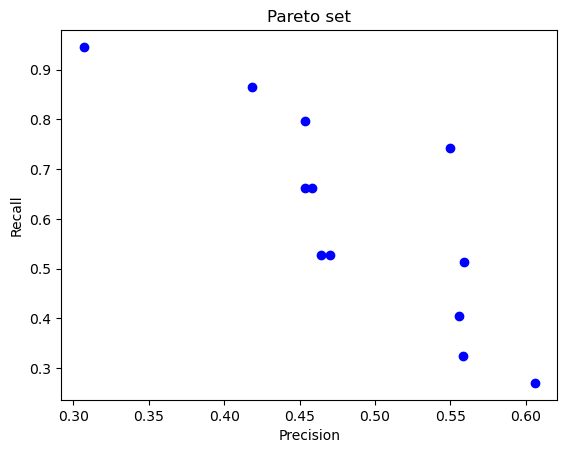

In [9]:
plot_values = []
pareto_front = automl.get_pareto_set()
for ensemble in pareto_front:
    predictions = ensemble.predict(X_test)
    precision = sklearn.metrics.precision_score(y_test, predictions)
    recall = sklearn.metrics.recall_score(y_test, predictions)
    plot_values.append((precision, recall))
fig = plt.figure()
ax = fig.add_subplot(111)
for precision, recall in plot_values:
    ax.scatter(precision, recall, c="blue")
ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_title("Pareto set")
plt.show()